In [1]:
import netCDF4
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import warnings
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
import cartopy.mpl.geoaxes
from scipy.signal import detrend
import pycif.utils.datastores.dump as cif
from scipy.signal import savgol_filter

warnings.filterwarnings("ignore")

import calendar
mo = calendar.month_name[1:]
for i in range(len(mo)):
    mo[i]=mo[i][:3]+'.'


ERROR 1: PROJ: proj_create_from_database: Open of /usr/local/install/python-3.9/share/proj failed


In [2]:
nc=netCDF4.Dataset('output_20250617_152310.nc')

obs=nc['data_site0_var0'][0,:].data
prior=nc['data_site0_var0'][1,:].data
post=nc['data_site0_var0'][-1,:].data
tstep=pd.date_range("1992-01-01", periods=len(obs),freq='1M')

p_min=nc['param_min'][:].data
p_max=nc['param_max'][:].data
p_id=nc['param_id'][:]
p_prior=nc['param_prior'][:].data
p_ens=nc['param'][1:31].data
p_post=nc['param'][-1].data
nc.close()

In [3]:
param_dict={'VCMAX25__06':r'$\bf Vc_{max_{25}}$',
            'SLA__06':r'${\bf SLA}$',
            'A1__06':r'${\bf a_1}$',
            'B1__06':'B1',
            'G0__06':r'$\bf g_0$',
            'ASV__06':r'${\bf a_{\Delta S,V}}$',
            'ASJ__06':r'${\bf a_{\Delta S,J}}$',
            'ARJV__06':r'${\bf a_{r_{J,V}}}$',
            'RS_SCALE':r'${\bf S}$',
            'HYDROL_HUMCSTE__06':r'$\bf Hum_{cst}$',
            'LEAFAGECRIT__06':r'$\bf L_{age,crit}$',
            'LAI_MAX__06':r'$\bf LAI_{max}$',
            'LAI_MAX_TO_HAPPY__06':'LAI_MAX_TO_HAPPY',
            'SENESCENCE_TEMP_C__06':r'$\bf c_{T_{crit}}$',
}

In [4]:
Xa=np.recfromtxt('Post_Ens')


In [5]:
nc3=netCDF4.Dataset('output_20250617_152310_2.nc')
p_post_No_dl=nc['param'][-1].data
nc3.close()
p_post_No_dl[0]=81.76899810574723
Xa_No_dl=np.recfromtxt('Post_Ens_no_dl')


# Fig 3b

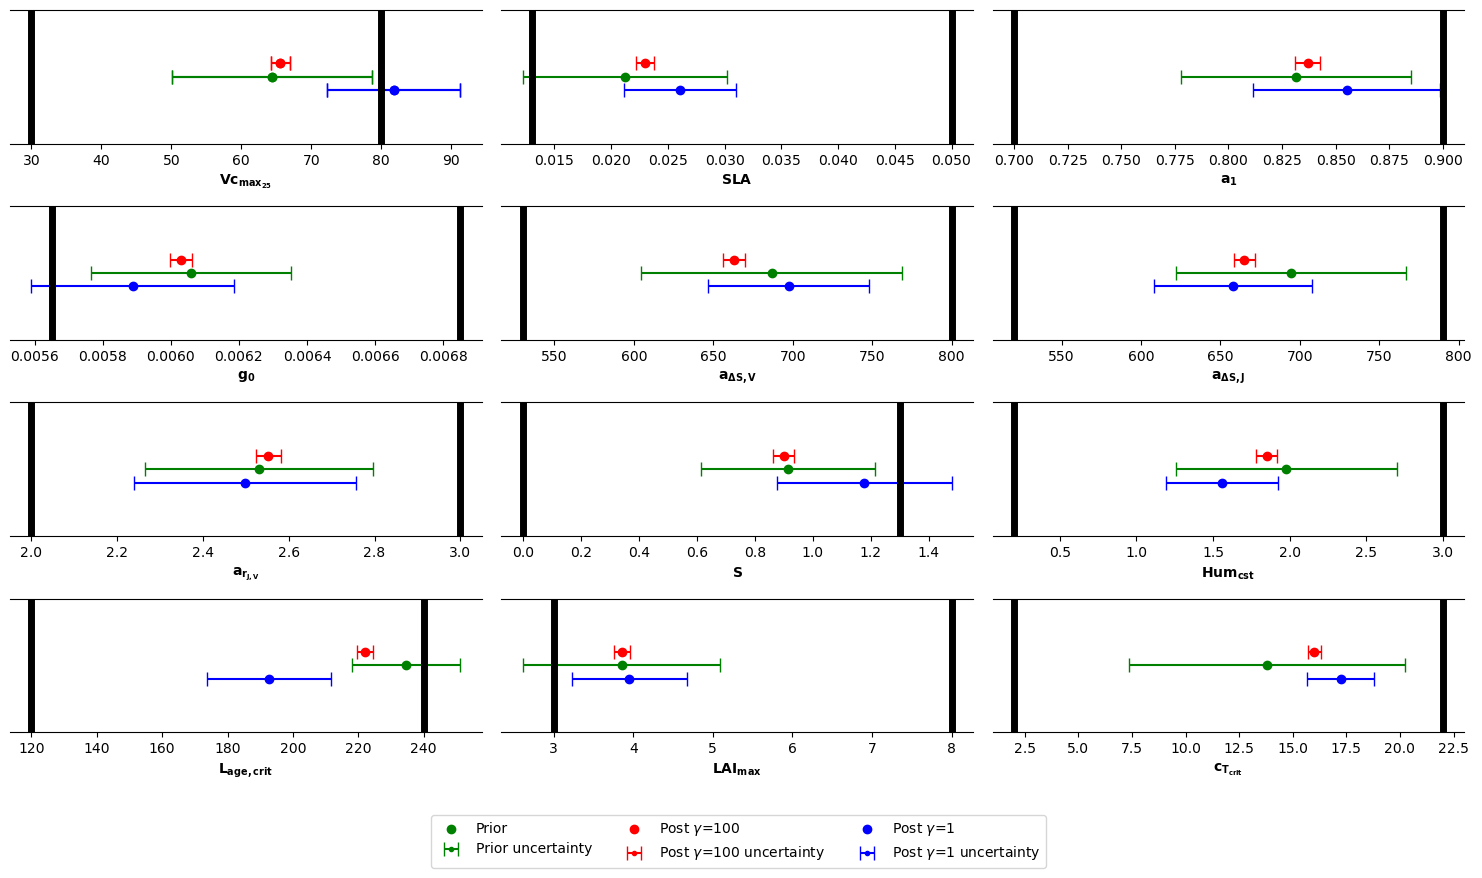

In [6]:
fig, ax = plt.subplots(nrows=4, ncols=3,sharey=False,sharex=False,figsize=(15,8))
stdtime=2
ax=ax.flatten()
i=0
a=ax[0].scatter(y=0.5,x=p_prior[0],color='green',marker='o',lw=1)
b=ax[i].errorbar(p_prior[i], 0.5, xerr=stdtime*np.std(p_ens[:,i],axis=0), marker=".",linestyle="none",color='green',label='Prior uncertainty',capsize = 5)
c=ax[0].scatter(y=0.6,x=p_post[0],color='red',marker='o',lw=1,label='Post DL=100')
d=ax[i].errorbar(p_post[i], 0.6, xerr=stdtime*np.std(Xa[i,:],axis=0), marker=".",linestyle="none",color='red',label='Post DL=100 uncertainty',capsize = 5)
e=ax[0].scatter(y=0.4,x=p_post_No_dl[0],color='blue',marker='o',lw=1,label='Post No DL')
f=ax[i].errorbar(p_post_No_dl[i], 0.4, xerr=stdtime*np.std(Xa_No_dl[i,:],axis=0), marker=".",linestyle="none",color='blue',label='Post No DL uncertainty',capsize = 5)


for i in range(len(p_min)):
#     g=sns.kdeplot(p_ens[:,i], bw=0.2,ax=ax[i])
#     maxg=max(g.get_lines()[0].get_ydata())
    maxg=1
#     a=ax[i].scatter(y=0.5,x=p_true[i],color='blue',marker='*',lw=1)
    ax[i].scatter(y=0.5,x=p_prior[i],color='green',marker='o',lw=1)
    ax[i].errorbar(p_prior[i], 0.5, xerr=stdtime*np.std(p_ens[:,i],axis=0), marker=".",linestyle="none",color='green',capsize = 5)
    ax[i].scatter(y=0.6,x=p_post[i],color='red',marker='o',lw=1)
    ax[i].errorbar(p_post[i], 0.6, xerr=stdtime*np.std(Xa[i,:],axis=0), marker=".",linestyle="none",color='red',capsize = 5)

    ax[i].scatter(y=0.4,x=p_post_No_dl[i],color='blue',marker='o',lw=1)
    ax[i].errorbar(p_post_No_dl[i], 0.4, xerr=stdtime*np.std(Xa_No_dl[i,:],axis=0), marker=".",linestyle="none",color='blue',capsize = 5)

    ax[i].set_ylim(0,1)
    ax[i].vlines(x=p_min[i],ymin=0,ymax=maxg,color='black',ls='-',lw=5)

    ax[i].vlines(x=p_max[i],ymin=0,ymax=maxg,color='black',ls='-',lw=5)

    ax[i].set_xlabel(param_dict[p_id[i]],fontweight='bold')
    ax[i].margins(y=0)
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["left"].set_visible(False)
    ax[i].set_yticks([-1])
    

lgd=fig.legend([a,b,c,d,e,f],['Prior','Prior uncertainty',r'Post $\gamma$=100',r'Post $\gamma$=100 uncertainty',r'Post $\gamma$=1',r'Post $\gamma$=1 uncertainty'],loc="lower center", bbox_to_anchor=(0.5, -0.1),ncol=3,)
# fig.legend(['Prior','Post with dogleash','Post no dogleash'],bbox_to_anchor=[0.75,0.25])
plt.tight_layout()

plt.savefig('PARAM_HA.pdf',bbox_inches='tight')
plt.savefig('PARAM.png',bbox_inches='tight')

# Fig 4b

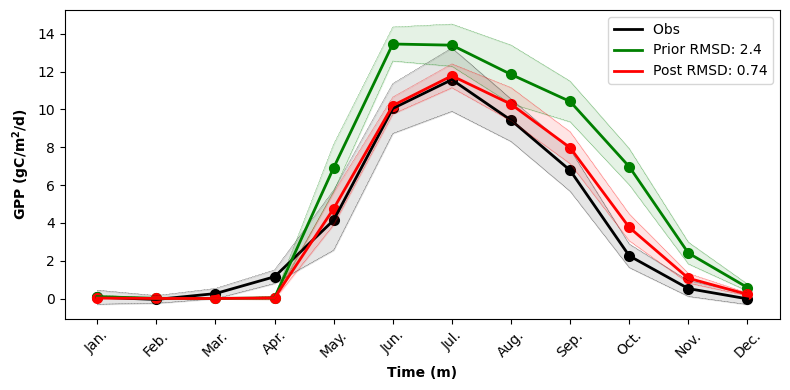

In [7]:
Var='GPP'
t=np.arange(12)+1
m_obs=xr.DataArray(obs).rename({'dim_0':'time'}).assign_coords({'time':tstep}).sel(time=slice("1992","2009"))
m_prior=xr.DataArray(prior).rename({'dim_0':'time'}).assign_coords({'time':tstep}).sel(time=slice("1992","2009"))
m_post=xr.DataArray(post).rename({'dim_0':'time'}).assign_coords({'time':tstep}).sel(time=slice("1992","2009"))
# plt.figure(figsize=(12,5))
plt.figure(figsize=(8,4))
se_obs=m_obs.groupby("time.month").mean("time")
se_prior=m_prior.groupby("time.month").mean("time")
se_post=m_post.groupby("time.month").mean("time")

m=m_obs
c='black'
plt.plot(t,m.groupby("time.month").mean("time"),color=c,lw=2,label='Obs ')
plt.plot(t,m.groupby("time.month").mean("time")-m.groupby("time.month").std("time"),color=c,lw=0.2,ls='--')
plt.plot(t,m.groupby("time.month").mean("time")+m.groupby("time.month").std("time"),color=c,lw=0.2,ls='--')
plt.fill_between(t,m.groupby("time.month").mean("time")-m.groupby("time.month").std("time"),m.groupby("time.month").mean("time")+m.groupby("time.month").std("time"),color=c,alpha=0.1)
plt.scatter(t,m.groupby("time.month").mean("time"),color=c,lw=2,)


m=m_prior
c='green'
plt.plot(t,m.groupby("time.month").mean("time"),color=c,lw=2,label=f'Prior RMSD: {round(np.sqrt(np.mean((se_obs.data - se_prior.data)**2)),2)}')
plt.plot(t,m.groupby("time.month").mean("time")-m.groupby("time.month").std("time"),color=c,lw=0.2,ls='--')
plt.plot(t,m.groupby("time.month").mean("time")+m.groupby("time.month").std("time"),color=c,lw=0.2,ls='--')
plt.fill_between(t,m.groupby("time.month").mean("time")-m.groupby("time.month").std("time"),m.groupby("time.month").mean("time")+m.groupby("time.month").std("time"),color=c,alpha=0.1)
plt.scatter(t,m.groupby("time.month").mean("time"),color=c,lw=2,)


m=m_post
c='red'
plt.plot(t,m.groupby("time.month").mean("time"),color=c,lw=2,label=f'Post RMSD: {round(np.sqrt(np.mean((se_obs.data - se_post.data)**2)),2)}')
plt.plot(t,m.groupby("time.month").mean("time")-m.groupby("time.month").std("time"),color=c,lw=0.2,ls='--')
plt.plot(t,m.groupby("time.month").mean("time")+m.groupby("time.month").std("time"),color=c,lw=0.2,ls='--')
plt.fill_between(t,m.groupby("time.month").mean("time")-m.groupby("time.month").std("time"),m.groupby("time.month").mean("time")+m.groupby("time.month").std("time"),color=c,alpha=0.1)
plt.scatter(t,m.groupby("time.month").mean("time"),color=c,lw=2,)
plt.xticks(t,mo,rotation=45)


plt.legend()
plt.ylabel(fr'{Var} ($\bf gC/m^2/d$)',fontweight='bold')
plt.xlabel(fr'Time (m)' ,fontweight='bold')
# plt.title('Harvard site Montly cycle (1992-2009)',fontweight='bold')
plt.tight_layout()
plt.savefig('MC.pdf')
plt.savefig('MC.png')

# Fig 5

In [8]:
ds=xr.open_dataset('Obs_1992_2012.nc')
Var='GPP'
tstep=ds['GPP'].resample(tstep="1M").sum().sel(tstep=slice("2010","2012"))['tstep']
OBS=ds['GPP'].resample(tstep="1D").sum().resample(tstep="1M").mean().sel(tstep=slice("2010","2012")).to_numpy().flatten()

In [9]:
nc=netCDF4.Dataset(f'output_20250715_150024.nc')
ORCHIDEE=nc['data_site0_var0'][1][-len(OBS):].data
nc.close()

In [10]:
# ds=xr.open_dataset('/home/users/sbeylat/LAVENDER/XMLreal/Ha1/ARTICLE/hxa_cube_realobs_US_Ha1_DAwithGPP_outputofGPP_20_gammaval50_1992-2009.nc')
ds=xr.open_dataset('hxa_cube_realobs_US_Ha1_DAwithGPP_outputofGPP_20_gammaval60_1992-2009.nc')
JULES=ds['unknown'].sel(time=slice('2010','2012')).to_numpy().flatten()

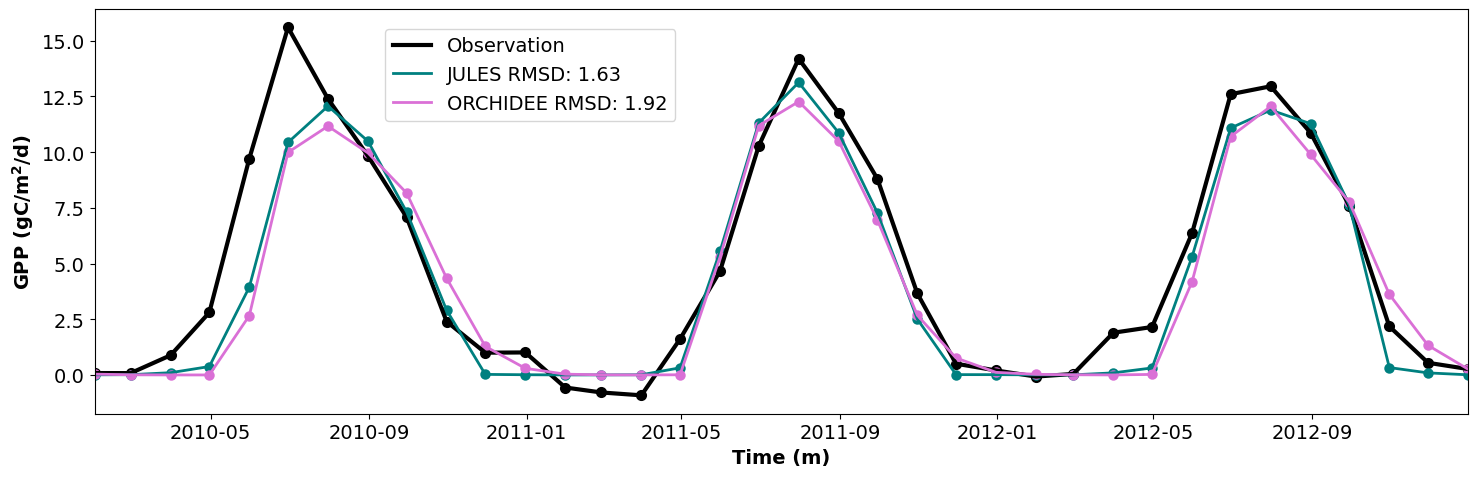

In [11]:
Var='GPP'
plt.figure(figsize=(15,5))

plt.rcParams.update({'font.size': 14})
plt.plot(tstep,OBS,color='black',lw=3,label='Observation')
plt.scatter(tstep,OBS,color='black',lw=2)

rmsd=round(np.sqrt(np.mean((OBS - JULES)**2)),2)
plt.plot(tstep,JULES,color='#008080',lw=2,label=f'JULES RMSD: {str(rmsd)}')
plt.scatter(tstep,JULES,color='#008080',lw=1.5)

rmsd=round(np.sqrt(np.mean((OBS - ORCHIDEE)**2)),2)
plt.plot(tstep,ORCHIDEE,color='#da70d6',lw=2,label=f'ORCHIDEE RMSD: {str(rmsd)}')
plt.scatter(tstep,ORCHIDEE,color='#da70d6',lw=1.5)

# plt.plot(tstep,post,color='red',lw=1,label=f'Post RMSD: {round(np.sqrt(np.mean((obs - post)**2)),2)}')

plt.margins(x=0)
plt.legend(bbox_to_anchor=[0.43,0.7])
plt.ylabel(fr'{Var} ($\bf gC/m^2/d$)',fontweight='bold')
plt.xlabel(fr'Time (m)' ,fontweight='bold')
# plt.title('Harvard site daily Time Series (2010-2012)',fontweight='bold')
plt.tight_layout()
plt.savefig('VAL_GPP.pdf')